In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Bold font for plot
plt.rcParams['font.weight'] = 'bold'

In [3]:
task1_df = pd.read_csv('../result/task1.csv')
task2_df = pd.read_csv('../result/task2.csv')
task3_df = pd.read_csv('../result/task3.csv')

In [4]:
task1_df # Table

,Model,Best_Epoch,HR,NDCG
0,GMF,18,0.639,0.368
1,MLP,16,0.675,0.397
2,NeuMF-end,15,0.681,0.404


In [5]:
task2_df # graph

,Layer_Number,Best_Epoch,HR,NDCG
0,0,16,0.453,0.252
1,1,19,0.611,0.344
2,2,16,0.657,0.381
3,3,18,0.670,0.393
4,4,9,0.681,0.407


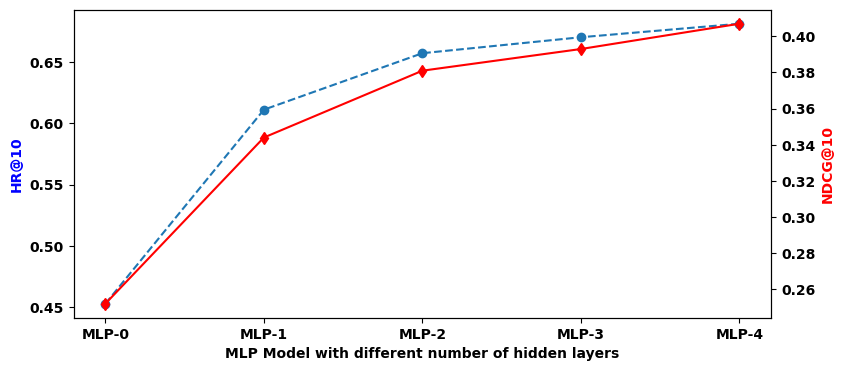

In [19]:
fig, ax = plt.subplots(1, figsize=(9, 4))

x_ticks = ['MLP-0', 'MLP-1', 'MLP-2', 'MLP-3', 'MLP-4']

# Plot the HR@10 and NDCG@10 twin y axis
ax.plot(x_ticks, task2_df['HR'], marker='o', linestyle='--')
ax.set_xlabel('MLP Model with different number of hidden layers', weight='bold')
ax.set_ylabel('HR@10', color='b', weight='bold')
ax2 = ax.twinx()
ax2.plot(x_ticks, task2_df['NDCG'], color='r', marker='d')
ax2.set_ylabel('NDCG@10', color='r', weight='bold')

plt.savefig('layer.svg', bbox_inches='tight')
plt.show()

In [5]:
task3_df

,Model,Negatives,Best_Epoch,HR,NDCG
0,GMF,1,17,0.628,0.358
1,GMF,2,18,0.635,0.362
2,GMF,3,17,0.634,0.365
3,GMF,4,13,0.638,0.369
4,GMF,5,18,0.641,0.371
5,GMF,6,16,0.638,0.368
6,GMF,7,11,0.634,0.369
7,GMF,8,15,0.635,0.369
8,GMF,9,19,0.635,0.369
9,GMF,10,16,0.632,0.370


/tmp/ipykernel_183056/425804972.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(mlp_data['Negatives'], mlp_data['HR'], 'x-', label='MLP', linestyle='dashed')
/tmp/ipykernel_183056/425804972.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(mlp_data['Negatives'], mlp_data['NDCG'], 'x-', label='MLP', linestyle='dashed')


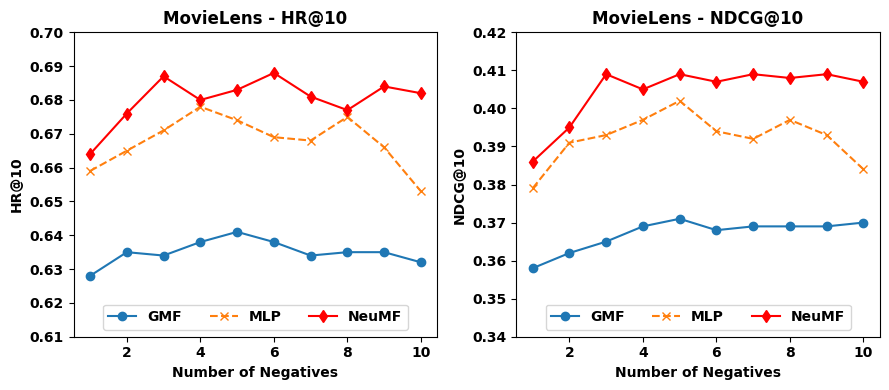

In [9]:
# Separate data by model
gmf_data = task3_df[task3_df['Model'] == 'GMF']
mlp_data = task3_df[task3_df['Model'] == 'MLP']
neumf_data = task3_df[task3_df['Model'] == 'NeuMF-end']

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# Plot HR@10
ax1.plot(gmf_data['Negatives'], gmf_data['HR'], 'o-', label='GMF')
ax1.plot(mlp_data['Negatives'], mlp_data['HR'], 'x-', label='MLP', linestyle='dashed')
ax1.plot(neumf_data['Negatives'], neumf_data['HR'], 'd-', label='NeuMF', color='red')
ax1.set_xlabel('Number of Negatives', weight='bold')
ax1.set_ylabel('HR@10', weight='bold')
ax1.set_title('MovieLens - HR@10', weight='bold')
ax1.set_ylim(0.61, 0.70)
ax1.legend(loc='lower center', ncol=3)

# Plot NDCG@10
ax2.plot(gmf_data['Negatives'], gmf_data['NDCG'], 'o-', label='GMF')
ax2.plot(mlp_data['Negatives'], mlp_data['NDCG'], 'x-', label='MLP', linestyle='dashed')
ax2.plot(neumf_data['Negatives'], neumf_data['NDCG'], 'd-', label='NeuMF', color='red')
ax2.set_xlabel('Number of Negatives', weight='bold')
ax2.set_ylabel('NDCG@10', weight='bold')
ax2.set_title('MovieLens - NDCG@10', weight='bold')
ax2.set_ylim(0.34, 0.42)
ax2.legend(loc='lower center', ncol=3)
    
# Show plot
plt.tight_layout()
plt.savefig('nn.svg', bbox_inches='tight')
plt.show()


In [11]:
ep_gmf_df = pd.read_csv('../result/50Epoch-GMF.csv')
ep_mlp_df = pd.read_csv('../result/50Epoch-MLP.csv')
ep_neumf_df = pd.read_csv('../result/50Epoch-NeuMF-end.csv')

In [25]:
ep_neumf_df.iloc[::2]

,Epoch,Loss,HR,NDCG
0,0,0.317,0.601,0.343
2,2,0.264,0.652,0.377
4,4,0.256,0.663,0.385
6,6,0.250,0.673,0.395
8,8,0.245,0.678,0.401
10,10,0.241,0.675,0.402
12,12,0.239,0.679,0.407
14,14,0.236,0.680,0.405
16,16,0.234,0.675,0.402
18,18,0.232,0.683,0.407


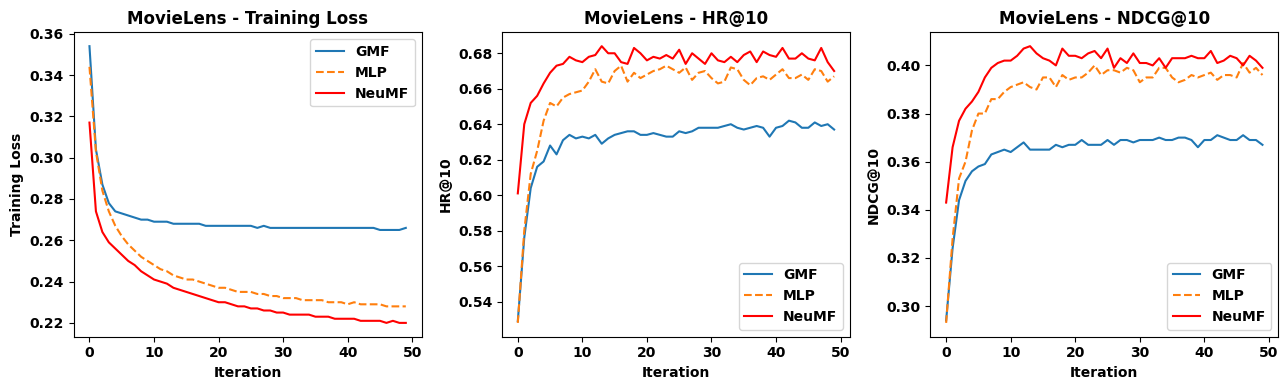

In [34]:
# Training loss, HR and NDCG
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

# Plot training loss
ax1.plot(ep_gmf_df['Epoch'], ep_gmf_df['Loss'], label='GMF')
ax1.plot(ep_mlp_df['Epoch'], ep_mlp_df['Loss'], label='MLP', linestyle='dashed')
ax1.plot(ep_neumf_df['Epoch'], ep_neumf_df['Loss'], label='NeuMF', color='red')
ax1.set_xlabel('Iteration', weight='bold')
ax1.set_ylabel('Training Loss', weight='bold')
ax1.set_title('MovieLens - Training Loss', weight='bold')
ax1.legend()

# Plot HR@10
ax2.plot(ep_gmf_df['Epoch'], ep_gmf_df['HR'], label='GMF')
ax2.plot(ep_mlp_df['Epoch'], ep_mlp_df['HR'], label='MLP', linestyle='dashed')
ax2.plot(ep_neumf_df['Epoch'], ep_neumf_df['HR'], label='NeuMF', color='red')
ax2.set_xlabel('Iteration', weight='bold')
ax2.set_ylabel('HR@10', weight='bold')
ax2.set_title('MovieLens - HR@10', weight='bold')
ax2.legend()

# Plot NDCG@10
ax3.plot(ep_gmf_df['Epoch'], ep_gmf_df['NDCG'], label='GMF')
ax3.plot(ep_mlp_df['Epoch'], ep_mlp_df['NDCG'], label='MLP', linestyle='dashed')
ax3.plot(ep_neumf_df['Epoch'], ep_neumf_df['NDCG'], label='NeuMF', color='red')
ax3.set_xlabel('Iteration', weight='bold')
ax3.set_ylabel('NDCG@10', weight='bold')
ax3.set_title('MovieLens - NDCG@10', weight='bold')
ax3.legend()

# Show plot
plt.tight_layout()
plt.savefig('epoch.svg', bbox_inches='tight')
plt.show()